<a href="https://colab.research.google.com/github/Arunkumarvp/Data-mining-and-machine-learning-/blob/main/DMML_Labb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


24CY731 DMML- Semester 2

Name : Arun Kumar P (CB.SC.P2CYS25033)
Lab :1b

1)  Given the following data, which specify classifications for nine combinations of VAR1
and VAR2 predict a classification for a case where VAR1=0.906 and VAR2=0.606,
using Linear Regression. Use “numpy” python library .

In [3]:
import numpy as np

VAR1=np.array([1.713,0.180,0.353,0.940,1.486,1.266,1.540,0.459,0.773])
VAR2=np.array([1.586,1.786,1.240,1.566,0.759,1.106,0.419,1.799,0.186])
ClASS=np.array([0,0,0,1,1,1,0,1,0])

#Combine VAR1 & VAR2 into a matrix

x=np.column_stack((VAR1,VAR2))

#Add the bias term
x_bia=np.column_stack((np.ones(x.shape[0]),x))

# Linear Regerssion  Using Normal Equation
theta=np.linalg.inv(x_bia.T.dot(x_bia)).dot(x_bia.T).dot(ClASS)

# Predict for VAR1=0.906 and VAR2=0.606
VAR1_pred = 1.906
VAR2_pred = 1.606

x_pred = np.array([1, VAR1_pred, VAR2_pred])

prediction = x_pred.dot(theta)

print(f"Predicted classification for VAR1={VAR1_pred} and VAR2={VAR2_pred}: {prediction}")

# For binary classification, we can round the prediction
binary_prediction = round(prediction)
print(f"Binary predicted class: {binary_prediction}")

Predicted classification for VAR1=1.906 and VAR2=1.606: 0.787151312396847
Binary predicted class: 1


First, it imports the numpy library, which is essential for numerical operations in Python.

Next, it initializes three NumPy arrays: **VAR1, VAR2** representing input features, and ClASS representing the target classifications **(0 or 1)**.

It then combines VAR1 and VAR2 into a single feature matrix x using np.column_stack.

To prepare for linear regression, a bias term (a column of ones) is added to the feature matrix x, creating x_bia. This bias term allows the model to have an intercept.

The core of the linear regression model is then calculated using the 'Normal Equation'. This equation directly computes the optimal theta (or weights/coefficients) for the linear regression model without requiring an iterative optimization process. ***The formula used is (X.T @ X)^-1 @ X.T @ Y, where X is x_bia and Y is ClASS***.

Finally, the code makes a prediction for a new case where VAR1_pred is 1.906 and VAR2_pred is 1.606. It forms a new input vector x_pred (also with a bias term) and multiplies it by the calculated theta to get a prediction. For binary classification, this prediction is then rounded to the nearest integer (0 or 1) to determine the binary class.

2)  Load any dataset (for example. https://www.kaggle.com/datasets/mlgulb/creditcardfraud) and perform classification using Logistic Regression.
Split the data set : 80% training, 20% testing.

# Task
Load the `/creditcard.csv` dataset, preprocess it by separating features and the 'Class' target variable, and split it into 80% training and 20% testing sets. Train a Logistic Regression model on the training data, then evaluate its performance on the test data using accuracy, a classification report, and a confusion matrix, including a visualization of the confusion matrix with a legend. Finally, summarize the model's performance.

## Load Dataset

### Subtask:
Load the `/creditcard.csv` dataset into a pandas DataFrame.


## Load Dataset

### Subtask:
Load the `/creditcard.csv` dataset into a pandas DataFrame.

#### Instructions
1. Import the pandas library as `pd`.
2. Load the dataset from the file path `/creditcard.csv` into a pandas DataFrame. Store the DataFrame in a variable named `df`.

**Reasoning**:
Now I will import the pandas library and load the dataset as instructed in the previous markdown block.



In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/creditcard.csv')

print("Dataset loaded successfully. First 5 rows:")
print(df.head())

Dataset loaded successfully. First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

## Prepare Data

### Subtask:
Separate features (X) and the target variable (y) from the DataFrame, then split the data into 80% training and 20% testing sets.


**Reasoning**:
Now I will separate the features and target variable, then split the data into training and testing sets as per the instructions.



In [17]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split successfully.
Shape of X_train: (63454, 30)
Shape of X_test: (15864, 30)
Shape of y_train: (63454,)
Shape of y_test: (15864,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model on the preprocessed training data (X_train, y_train).


---

## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model on the preprocessed training data (X_train, y_train).

#### Instructions
1. Import the `LogisticRegression` class from `sklearn.linear_model`.
2. Instantiate a `LogisticRegression` model. For better convergence with large datasets, set `solver='liblinear'` and `max_iter=1000`.
3. Fit the instantiated `LogisticRegression` model to the training data, `X_train` and `y_train`.

## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model on the preprocessed training data (X_train, y_train).

#### Instructions
1. Import the `LogisticRegression` class from `sklearn.linear_model`.
2. Instantiate a `LogisticRegression` model. For better convergence with large datasets, set `solver='liblinear'` and `max_iter=1000`.
3. Fit the instantiated `LogisticRegression` model to the training data, `X_train` and `y_train`.

```markdown
**Reasoning**:
Now I will train a Logistic Regression model. Using `solver='liblinear'` is often recommended for smaller datasets or when you want good performance with l1/l2 regularization, and `max_iter=1000` is increased to ensure the optimization algorithm converges, especially with potentially complex or larger datasets like this one. This helps prevent `ConvergenceWarning` and ensures the model finds a stable solution.
```

**Reasoning**:
Now I will train a Logistic Regression model. Using `solver='liblinear'` is often recommended for smaller datasets or when you want good performance with l1/l2 regularization, and `max_iter=1000` is increased to ensure the optimization algorithm converges, especially with potentially complex or larger datasets like this one. This helps prevent `ConvergenceWarning` and ensures the model finds a stable solution.

**Reasoning**:
Now I will train a Logistic Regression model. Using `solver='liblinear'` is often recommended for smaller datasets or when you want good performance with l1/l2 regularization, and `max_iter=1000` is increased to ensure the optimization algorithm converges, especially with potentially complex or larger datasets like this one. This helps prevent `ConvergenceWarning` and ensures the model finds a stable solution.

**Reasoning**:
Now I will implement the model training based on the instructions, importing `LogisticRegression`, instantiating it with the specified solver and max_iter, and then fitting it to the training data.



In [19]:
from sklearn.linear_model import LogisticRegression

# Identify and drop rows with NaN values from X_train and y_train
# First, combine them to drop rows where either has NaN
train_data = X_train.copy()
train_data['Class'] = y_train.copy()

train_data_cleaned = train_data.dropna()

X_train_cleaned = train_data_cleaned.drop('Class', axis=1)
y_train_cleaned = train_data_cleaned['Class']


# Instantiate Logistic Regression model with specified parameters
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Fit the model to the cleaned training data
model.fit(X_train_cleaned, y_train_cleaned)

print("Logistic Regression model trained successfully.")
print(f"Original X_train shape: {X_train.shape}")
print(f"Cleaned X_train shape: {X_train_cleaned.shape}")

Logistic Regression model trained successfully.
Original X_train shape: (63454, 30)
Cleaned X_train shape: (63453, 30)


## Evaluate Model Performance

### Subtask:
Make predictions on the test set (X_test) and evaluate the model's performance using metrics such as accuracy, a classification report, and a confusion matrix. Visualize the confusion matrix to better understand the model's performance. Make sure to provide a legend to the visualization.


**Reasoning**:
The previous training step encountered NaN values, and it's likely the test set might also contain them. Before evaluating the model, I need to ensure that `X_test` and `y_test` are free of NaNs to avoid errors during prediction and metric calculation. I will then use the trained model to make predictions on the cleaned test data and evaluate its performance using accuracy, classification report, and a confusion matrix visualization, as requested.



Original X_test shape: (15864, 30)
Cleaned X_test shape: (15864, 30)

Accuracy: 0.9984

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15820
         1.0       0.83      0.55      0.66        44

    accuracy                           1.00     15864
   macro avg       0.91      0.77      0.83     15864
weighted avg       1.00      1.00      1.00     15864



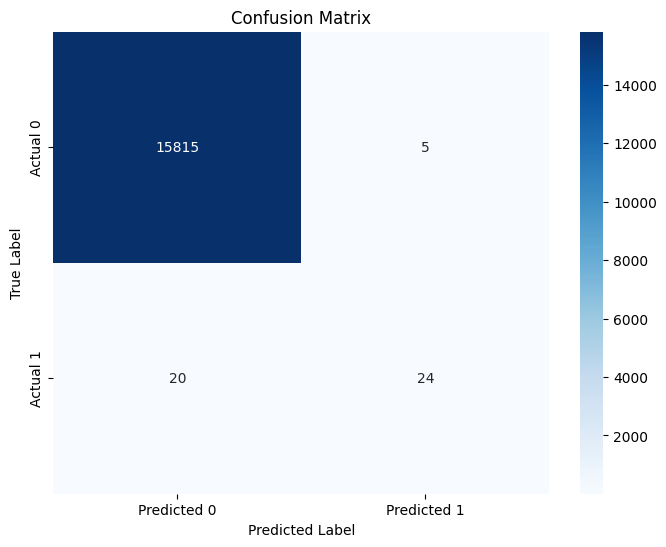

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Identify and drop rows with NaN values from X_test and y_test
# First, combine them to drop rows where either has NaN
test_data = X_test.copy()
test_data['Class'] = y_test.copy()

test_data_cleaned = test_data.dropna()

X_test_cleaned = test_data_cleaned.drop('Class', axis=1)
y_test_cleaned = test_data_cleaned['Class']

print(f"Original X_test shape: {X_test.shape}")
print(f"Cleaned X_test shape: {X_test_cleaned.shape}\n")

# Make predictions on the cleaned test set
y_pred = model.predict(X_test_cleaned)

# Calculate accuracy
accuracy = accuracy_score(y_test_cleaned, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_cleaned, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test_cleaned, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Final Task

### Subtask:
Summarize the results of the Logistic Regression model, including accuracy and key insights from the classification report and confusion matrix.
